In [24]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
#Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [26]:
#dataset api
!kaggle competitions download -c cifar-10

100% 715M/715M [00:33<00:00, 23.1MB/s]
100% 715M/715M [00:33<00:00, 22.4MB/s]


In [27]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [28]:
#extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
 zip.extractall()
 print('the dataset is extracted')

the dataset is extracted


In [29]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [30]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode ='r')
archive.extractall()  #archive.extractall(path='/content/Training Data')
archive.close()

In [32]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the dependencies

In [33]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [34]:
#going to train folder to make list
filename = os.listdir('/content/train')

In [35]:
type(filename)

list

In [36]:
len(filename)

50000

In [37]:
#print first 5 files
print(filename[0:5])
#print last 5 files
print(filename[-5:])

['4276.png', '35293.png', '36011.png', '32497.png', '14327.png']
['22134.png', '27512.png', '3475.png', '32009.png', '16316.png']


labels processing

In [38]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [39]:
labels_df.shape  # to know the number of Rows and column

(50000, 2)

In [40]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [41]:
labels_df[labels_df['id']== 7795]

,id,label
7794,7795,ship


In [42]:
labels_df.head(100)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
95,96,frog
96,97,automobile
97,98,automobile
98,99,deer


In [43]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [44]:
#Count Every Class
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [45]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [48]:
#Encode every class Manually 
#key value pairs(key= airplane, value= encoded value) 
labels_dictionary={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}
#read the labels dictionary key pair and make a list 
labels=[labels_dictionary[i] for i in labels_df['label']]

In [50]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


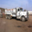

In [51]:
#dispplaying sample image from dataset
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7794.png')
cv2_imshow(img)

In [55]:
labels_df[labels_df['id']==7794]

,id,label
7793,7794,truck
